<a href="https://colab.research.google.com/github/stacykeago/Spam-detection-using--Gausian-Naive-Bayes/blob/main/Naive_Bayes_Classifier_Project___26_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**

###  Define the question

In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether the spambase dataset is a spam or not.

### Metric for success

### The context


### Experimental design taken 

### Appropriateness of available data to answer the given question.

# **DATA CLEANING**

## Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Load the data

In [ ]:
# Rename columns
spam = pd.read_csv('/content/spambase.data', header=None, names=list(range(0,58)))
spam.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Dataset Shape 

In [ ]:
spam.shape

(4601, 58)

### Check the columns in the dataset

In [ ]:
# Get the list of columns in  the dataset
spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

### Dataset summary information

In [ ]:
#Check for dataset info
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

### Statistical summary information

In [ ]:
spam.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
1,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
2,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
3,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
4,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
5,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
6,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
7,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
8,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
9,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


### Check for duplicates

In [ ]:
spam.duplicated().any()

True

### Check for Null values

In [ ]:
spam.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

### Check for unique items

In [ ]:
# check for unique values
spam.nunique()

0      142
1      171
2      214
3       43
4      255
5      141
6      173
7      170
8      144
9      245
10     113
11     316
12     158
13     133
14     118
15     253
16     197
17     229
18     575
19     148
20     401
21      99
22     164
23     143
24     395
25     281
26     240
27     200
28     156
29     179
30     128
31     106
32     184
33     110
34     177
35     159
36     188
37      53
38     163
39     125
40     108
41     186
42     136
43     160
44     230
45     227
46      38
47     106
48     313
49     641
50     225
51     964
52     504
53     316
54    2161
55     271
56     919
57       2
dtype: int64

### Check and allign data types

In [ ]:
spam.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

### Check for outliers

In [ ]:
spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

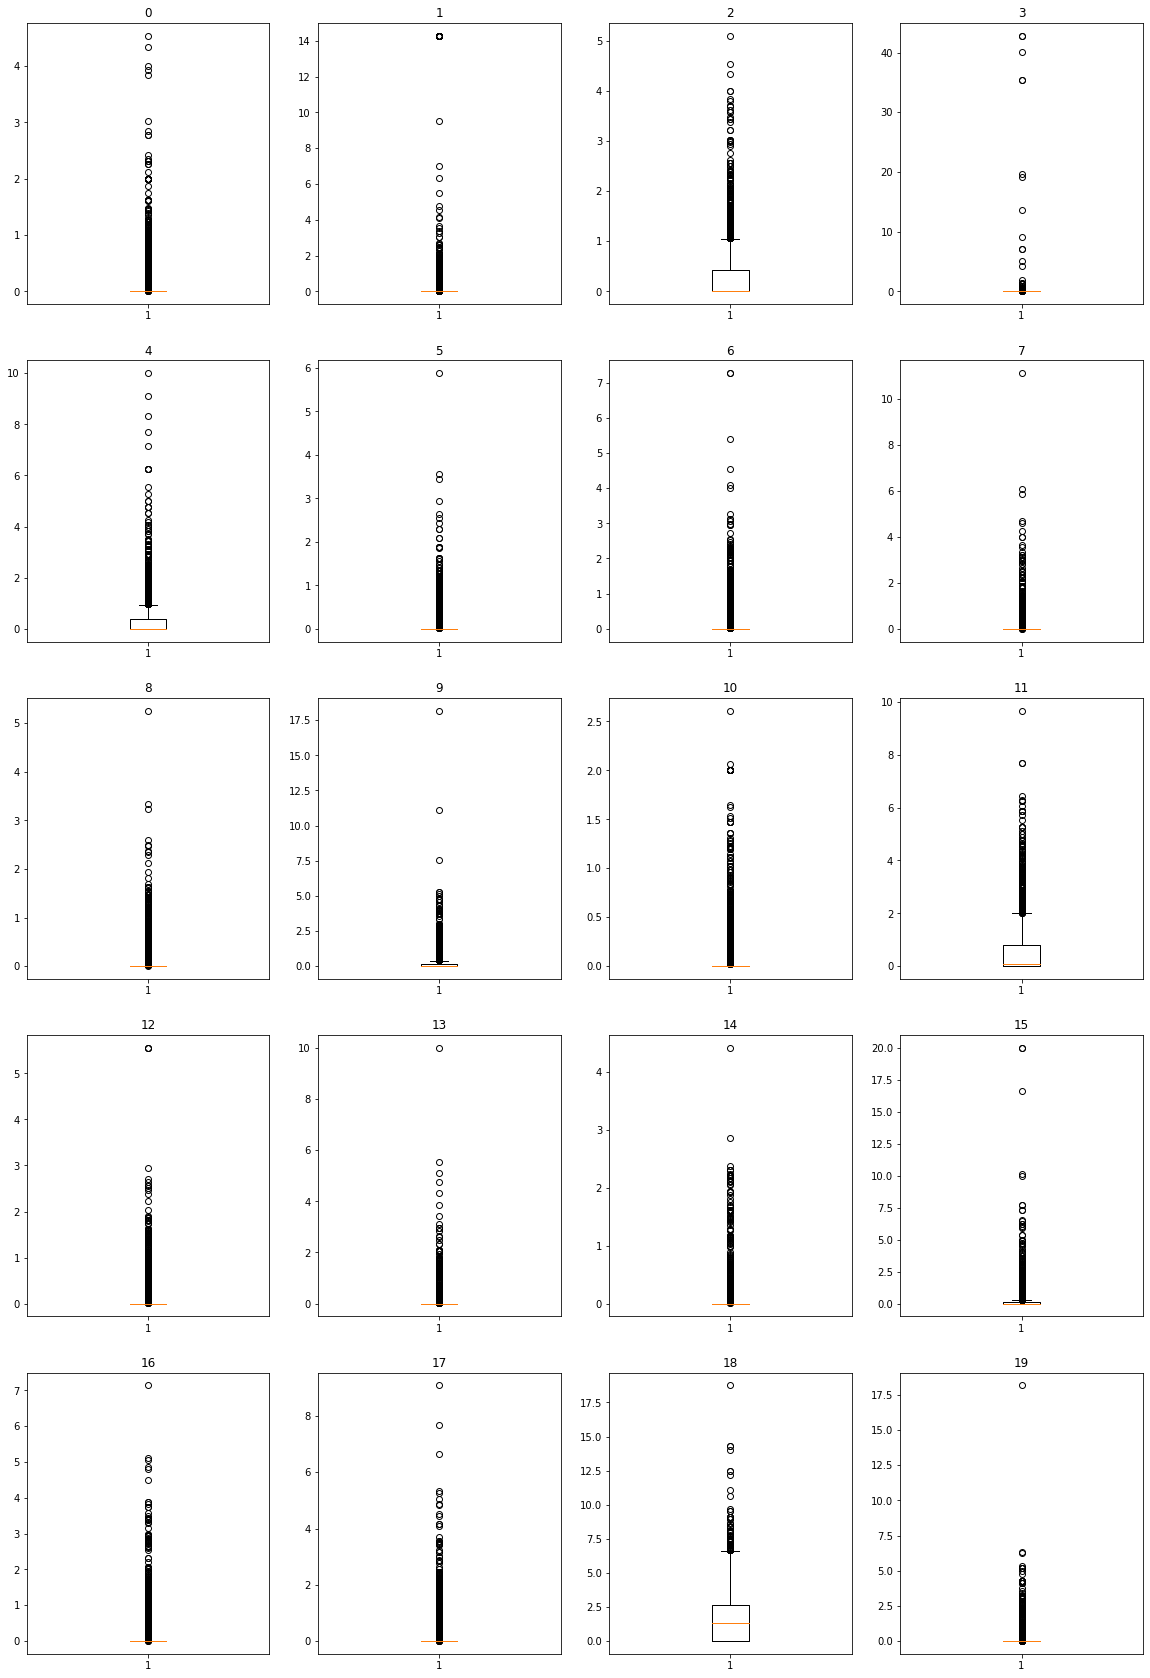

In [ ]:
# Check for outliers for the rest of the columns
col_dict ={0:1,  1:2, 2:3, 3:4, 4:5, 5:6,  6:7,  7:8,  8:9,  9:10, 10:11, 11:12, 12:13, 13:14, 14:15, 15:16, 
      16:17, 17:18, 18:19, 19:20}
col2_dict ={20:1, 21:2, 22:3, 23:4, 24:5, 25:6, 26:7, 27:8, 28:9, 29:10, 30:11, 31:12, 32:13, 
            33:14, 34:15, 35:16, 36:17, 37:18}
col3_dict ={38:1, 39:2, 40:3, 41:4, 42:5, 43:6, 44:7, 45:8, 46:9, 47:10, 48:11, 49:12, 50:13, 51:14, 52:15, 
            53:16, 54:17, 55:18, 56:19, 57:20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(spam[variable])
  plt.title(variable)

plt.show()

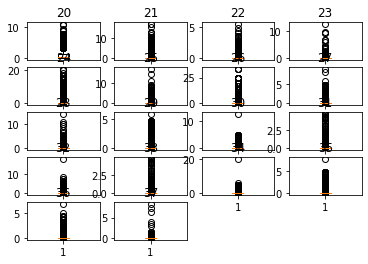

In [ ]:
# make a boxplot for each numerical column
col2_dict ={20:1, 21:2, 22:3, 23:4, 24:5, 25:6, 26:7, 27:8, 28:9, 29:10, 30:11, 31:12, 32:13, 
            33:14, 34:15, 35:16, 36:17, 37:18}

for variable,i in col2_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(spam[variable])
  plt.title(variable)

plt.show()

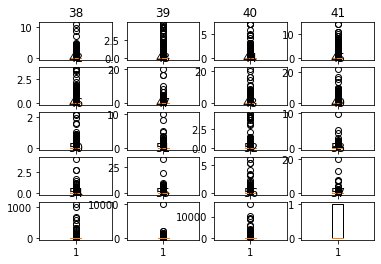

In [ ]:
col3_dict ={38:1, 39:2, 40:3, 41:4, 42:5, 43:6, 44:7, 45:8, 46:9, 47:10, 48:11, 49:12, 50:13, 51:14, 52:15, 
            53:16, 54:17, 55:18, 56:19, 57:20}
# make a boxplot for each numerical column
for variable,i in col3_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(spam[variable])
  plt.title(variable)

plt.show()

### Check for anormalies 

In [ ]:
spam.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [ ]:
spam.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

# **UNIVARIATE ANALYSIS**

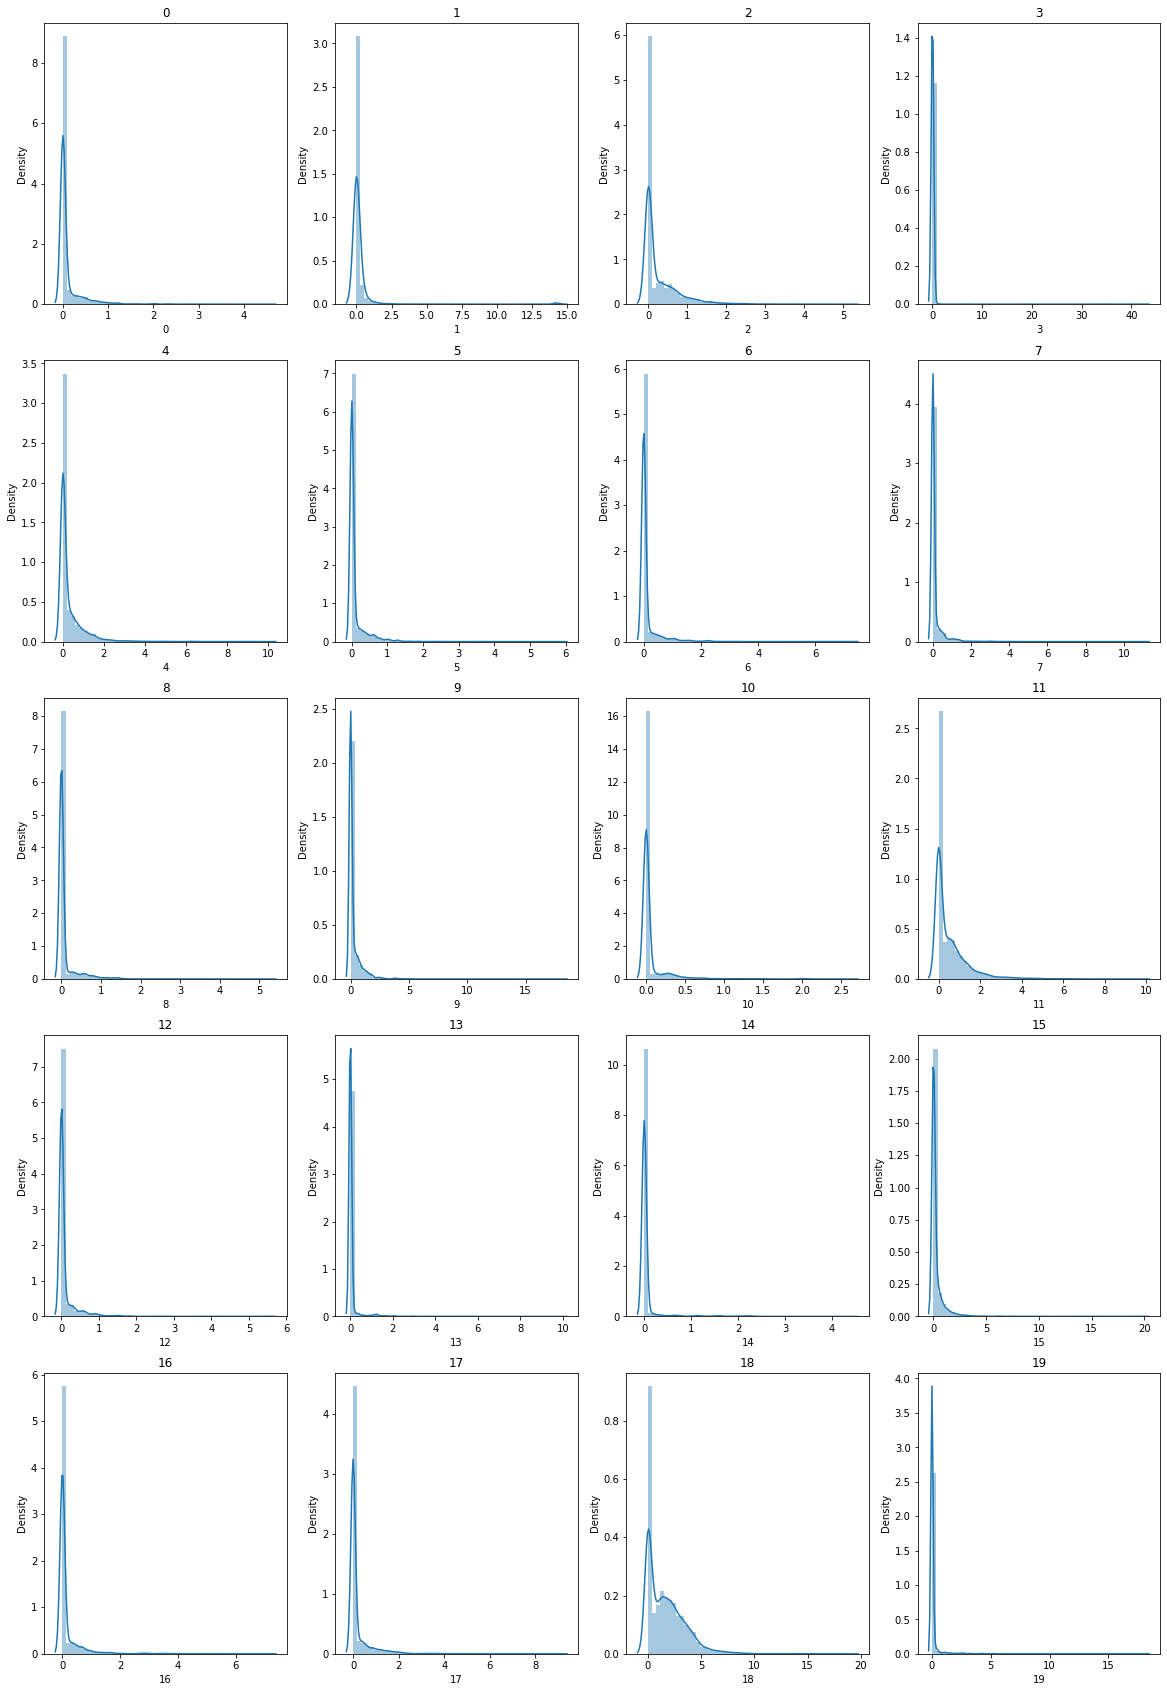

In [ ]:
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved

col_dict ={0:1,  1:2, 2:3, 3:4, 4:5, 5:6,  6:7,  7:8,  8:9,  9:10, 10:11, 11:12, 12:13, 13:14, 14:15, 15:16, 
      16:17, 17:18, 18:19, 19:20}
col2_dict ={20:1, 21:2, 22:3, 23:4, 24:5, 25:6, 26:7, 27:8, 28:9, 29:10, 30:11, 31:12, 32:13, 
            33:14, 34:15, 35:16, 36:17, 37:18}
col3_dict ={38:1, 39:2, 40:3, 41:4, 42:5, 43:6, 44:7, 45:8, 46:9, 47:10, 48:11, 49:12, 50:13, 51:14, 52:15, 
            53:16, 54:17, 55:18, 56:19, 57:20}

plt.figure(figsize = (20,30))
for variable,i in col_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(spam[variable])
  plt.title(variable)

plt.show()

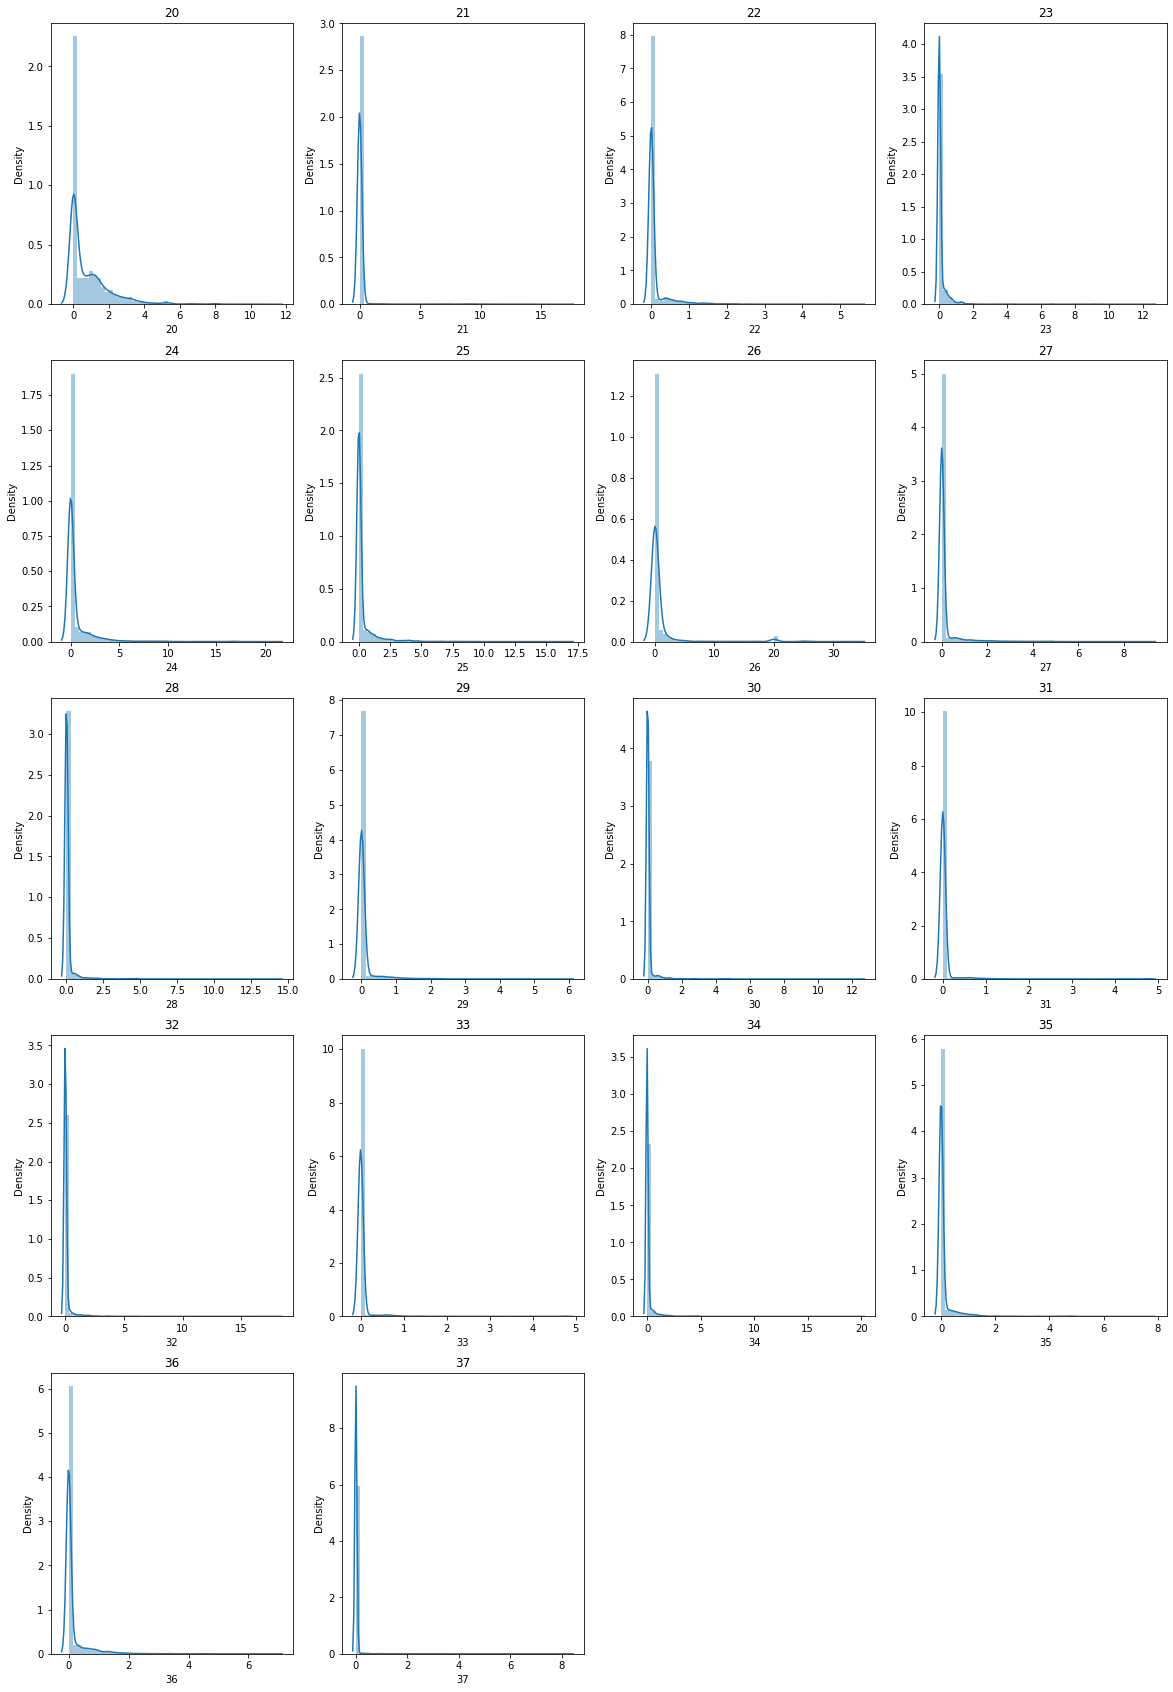

In [ ]:
plt.figure(figsize = (20,30))
for variable,i in col2_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(spam[variable])
  plt.title(variable)

plt.show()

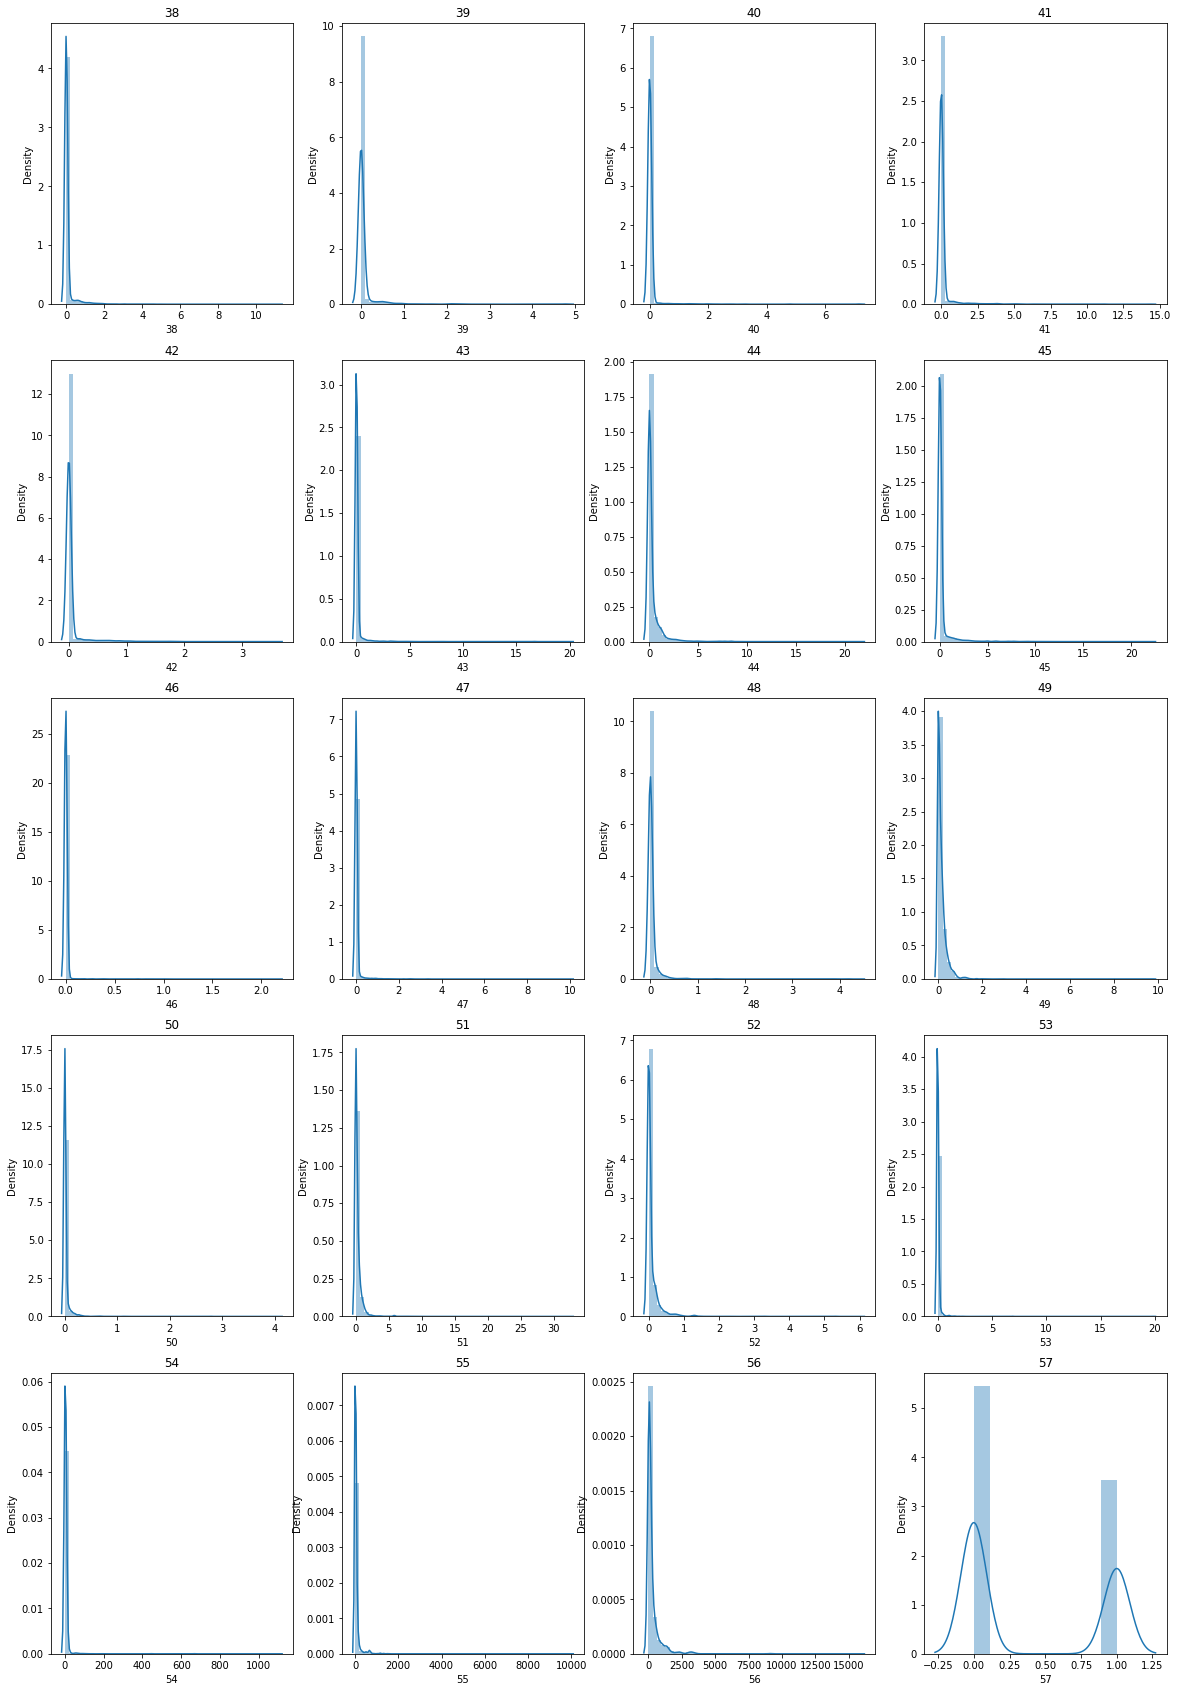

In [ ]:
plt.figure(figsize = (20,30))
for variable,i in col3_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(spam[variable])
  plt.title(variable)

plt.show()

BIVARIATE ANALYSIS 

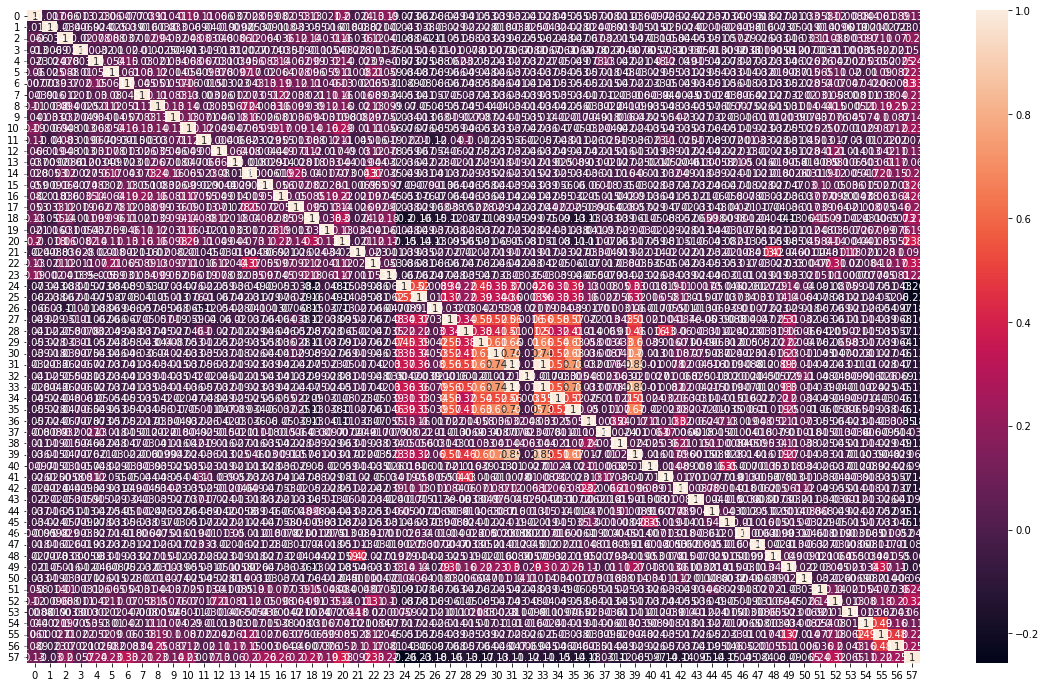

In [ ]:
# Plot a heatmap bivariate analysis of our data
plt.figure(figsize=(20, 12))

vg_corr = spam.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

#  MULTIVARIATE ANALYSIS

In [ ]:
correlation = spam.corr()

In [ ]:
# Check the correlation between 'survived' and the other variables
correlation[55].sort_values(ascending=False)

55    1.000000
54    0.492638
56    0.475486
49    0.370963
57    0.216097
14    0.213992
8     0.189247
52    0.183144
22    0.123036
2     0.107463
9     0.103308
19    0.099463
5     0.090172
10    0.086791
20    0.085321
51    0.077392
17    0.075122
16    0.062672
53    0.061657
0     0.061382
13    0.060993
6     0.059677
4     0.052290
23    0.044870
12    0.041962
48    0.040829
7     0.037575
21    0.027775
15    0.026528
3     0.022081
11    0.021774
18    0.006530
1     0.000271
39   -0.004835
37   -0.009487
46   -0.010154
50   -0.013994
47   -0.016894
42   -0.017279
40   -0.023658
33   -0.024532
43   -0.025918
32   -0.025919
30   -0.027449
31   -0.027732
38   -0.029229
34   -0.030236
36   -0.033204
45   -0.033365
41   -0.034585
28   -0.034733
35   -0.038100
27   -0.038772
29   -0.039001
24   -0.051206
25   -0.051806
44   -0.051858
26   -0.054400
Name: 55, dtype: float64

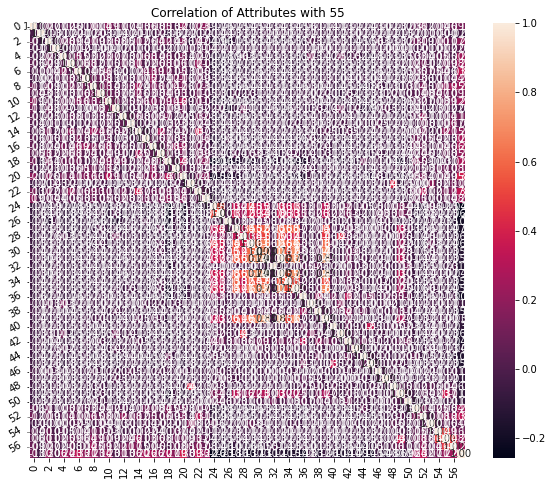

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with 55')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# NAIVE BAYES

# 1.00 Step 1: Split the data using a 80%-20% training-testing split

### 1.10 Declare feature vector and target variable

In [ ]:
X = spam.drop([55], axis=1)
y = spam[55]

In [ ]:
# split X and y into training and testing sets use 80%-20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1.21 Model training

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

### 1.22 Predict the results

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([ 669,  119,    3,   68,  119,    2,   99,  119,  139,   13,   76,
         30,  669,  147,   81,    2,  494,   39,   59,   99,   57,   26,
          1,    2,    3,   97,  152,   99,    3,  131,    2,   68,   62,
         10,  104,   32,   81,   57,    2,   76,   72,  181,    5,   76,
        104,   68,    2,  142,   91,   68,  121,   99,  152,   48,    9,
        116,   99,  121, 1177,  117,   53,  119,   81,   46,   76,  142,
         22,  119,   81,   39,   34,    2,   56,   56,   54,    5,   99,
         11,  121,   99,   59,   22,   71,   68,   55,   59,   31,   61,
         51,   33,   60,   85,   11,   78,  119,   68,   11,  142,   63,
          3,   52,  152,   59,   30,   57,  137,  148,   99,   75,  122,
         33,  119,   73,  152,   11,   68,  124,  110,   61,   13,   39,
         70,   78,  104,   71,   87,   10,  489,  181,   63,   97,    2,
         32,  116,  127,   78,   60,   61,   53,   70,   57,  137,   21,
        121,  121,   73,  121,  136,  295,   62,   

### 1.22 Check the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1357


### 1.23 Compare train and test accuracy score

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([119, 363, 140, ..., 178,  57,  59])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.2655


### 1.24 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.2655
Test set score: 0.1357


### 1.25 Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[27  4  0 ...  0  0  0]
 [ 0  4  2 ...  0  0  0]
 [ 0  7  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

True Positives(TP) =  27

True Negatives(TN) =  4

False Positives(FP) =  4

False Negatives(FN) =  0


The confusion matrix shows 27 + 4 = 31 correct predictions and 4 + 0 = 4 incorrect predictions.

In this case, we have
True Positives (Actual Positive:1 and Predict Positive:1) - 27
True Negatives (Actual Negative:0 and Predict Negative:0) - 4
False Positives (Actual Negative:0 but Predict Positive:1) - 4 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

# Step 2: Split the data using a 70%-30% training-testing split

### 2.10 Declare feature vector and target variable

In [ ]:
X = spam.drop([55], axis=1)
y = spam[55]

In [ ]:
# split X and y into training and testing sets use 70%-30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 2.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,57
0,-0.340116,6.102258,-0.563526,-0.046529,-0.458174,-0.345517,-0.317686,-0.255834,-0.313912,-0.359898,-0.302665,-0.617530,-0.316030,-0.174347,-0.195079,-0.289823,-0.313369,-0.358801,0.039498,-0.155272,0.851716,-0.122892,-0.297812,-0.214025,-0.328308,-0.290606,0.794471,-0.226952,-0.163324,-0.225226,-0.151752,-0.140342,-0.169242,-0.14162,-0.185866,-0.236527,3.783353,-0.06509,-0.168953,-0.181518,-0.127062,-0.176085,7.442206,-0.125091,1.329676,-0.195824,-0.061737,-0.110025,-0.156231,-0.495148,-0.152781,-0.320114,-0.295107,0.483721,-0.104394,-0.389004,-0.798651
1,0.613495,-0.164445,0.029653,-0.046529,-0.458174,-0.345517,-0.317686,-0.255834,1.291569,0.064538,-0.302665,-0.115192,-0.316030,-0.174347,-0.195079,-0.126213,-0.313369,-0.358801,0.815454,-0.155272,0.754653,-0.122892,-0.297812,0.097289,-0.328308,-0.290606,-0.230010,-0.226952,-0.163324,-0.225226,-0.151752,-0.140342,-0.169242,-0.14162,-0.185866,-0.236527,-0.327536,-0.06509,-0.168953,-0.181518,-0.127062,-0.176085,-0.207304,-0.125091,-0.289802,-0.195824,-0.061737,-0.110025,0.030262,-0.259657,-0.152781,-0.218154,-0.099285,-0.100746,-0.057425,0.062768,1.252111
2,-0.340116,-0.164445,-0.563526,-0.046529,-0.458174,-0.345517,-0.317686,-0.255834,-0.313912,-0.359898,-0.302665,0.524147,-0.316030,-0.174347,-0.195079,-0.289823,-0.313369,-0.358801,-0.937424,-0.155272,-0.692479,-0.122892,-0.297812,-0.214025,-0.328308,-0.290606,-0.230010,-0.226952,-0.163324,-0.225226,-0.151752,-0.140342,-0.169242,-0.14162,-0.185866,-0.236527,-0.327536,-0.06509,-0.168953,-0.181518,-0.127062,-0.176085,-0.207304,-0.125091,-0.289802,-0.195824,-0.061737,-0.110025,-0.156231,-0.495148,-0.152781,-0.320114,-0.295107,-0.100746,-0.107891,-0.414456,-0.798651
3,-0.340116,-0.164445,-0.563526,-0.046529,-0.458174,-0.345517,-0.317686,-0.255834,-0.313912,-0.359898,-0.302665,-0.617530,-0.316030,-0.174347,-0.195079,-0.289823,-0.313369,-0.358801,-0.937424,-0.155272,-0.692479,-0.122892,-0.297812,-0.214025,-0.328308,-0.290606,-0.230010,-0.226952,-0.163324,-0.225226,-0.151752,-0.140342,-0.169242,-0.14162,-0.185866,-0.236527,-0.327536,-0.06509,-0.168953,-0.181518,-0.127062,-0.176085,-0.207304,-0.125091,-0.289802,-0.195824,-0.061737,-0.110025,-0.156231,-0.495148,-0.152781,-0.320114,-0.295107,-0.100746,-0.135456,-0.452634,-0.798651
4,-0.340116,-0.164445,-0.563526,-0.046529,1.836883,-0.345517,-0.317686,0.998551,-0.313912,0.386524,-0.302665,-0.035275,1.391719,-0.174347,-0.195079,0.306184,-0.313369,-0.358801,-0.077733,-0.155272,0.216390,-0.122892,-0.297812,-0.214025,-0.033166,0.260962,0.220761,0.781383,-0.163324,0.893988,-0.151752,-0.140342,-0.169242,-0.14162,0.729556,-0.236527,0.870494,-0.06509,-0.168953,-0.181518,1.211368,-0.176085,-0.207304,-0.125091,-0.289802,0.339219,-0.061737,-0.110025,-0.156231,0.068603,-0.152781,-0.223068,-0.295107,-0.100746,-0.108719,-0.333328,-0.798651


### 2.30 Model training

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

### 2.40 Predict results

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([669, 119,   3, ..., 121,  30,  33])

### 2.50 Check the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1188


### 2.60 Compare train and test accuracy score

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([ 13,  59, 121, ..., 178,  57,  59])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.2575


### 2.70 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.2575
Test set score: 0.1188


Train set (0.8554) has higher accuracy than test set(0.7804) in split train/test 70%-30%

### 2.80 Confusion matrix of the classifier.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11 39  0 ...  0  0  0]
 [ 0  7  3 ...  0  0  0]
 [ 0 12  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

True Positives(TP) =  11

True Negatives(TN) =  7

False Positives(FP) =  39

False Negatives(FN) =  0


The confusion matrix shows 11 + 7 = 18 correct predictions and 39 + 0 = 39 incorrect predictions.

In this case, we have
True Positives (Actual Positive:1 and Predict Positive:1) - 11
True Negatives (Actual Negative:0 and Predict Negative:0) - 7
False Positives (Actual Negative:0 but Predict Positive:1) - 39 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

# Step 3: Split the data using a 60%-40% training-testing split

### 3.10 Declare feature vector and target variable

In [ ]:
X = spam.drop([55], axis=1)
y = spam[55]

In [ ]:
# split X and y into training and testing sets use 60%-40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

### 3.20 Feature scaling

In [ ]:
cols = X_train.columns

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,56,57
0,0.529246,-0.164844,-0.295086,-0.043378,0.761814,-0.347412,-0.312029,-0.283139,-0.326172,-0.353375,-0.301455,0.007028,1.088522,-0.170803,-0.199131,-0.283481,-0.313424,-0.357814,-0.241617,-0.152742,0.300647,-0.116981,-0.305063,-0.211751,0.634195,0.678828,-0.189734,0.035016,0.063472,0.063219,0.158637,0.261880,-0.159798,0.260137,0.041234,0.093581,0.675321,-0.085625,-0.165365,0.194669,-0.125283,0.339386,0.363170,-0.119137,0.089387,-0.204347,-0.061114,0.682709,0.000702,-0.136247,0.021430,-0.286341,-0.302469,-0.097054,-0.068214,0.117589,-0.795091
1,-0.335957,0.521902,-0.560315,-0.043378,-0.444948,-0.347412,-0.312029,-0.283139,-0.326172,1.439854,-0.301455,-0.614683,-0.326835,-0.170803,-0.199131,-0.283481,-0.313424,-0.357814,-0.015760,-0.152742,-0.699182,9.475558,-0.305063,-0.211751,-0.324194,-0.299865,-0.227641,-0.226672,-0.165365,-0.225294,-0.151379,-0.140116,-0.159798,-0.141296,-0.184262,-0.235765,-0.335369,-0.085625,-0.165365,-0.182639,-0.125283,-0.174578,-0.205775,-0.119137,-0.280870,-0.204347,-0.061114,-0.111984,15.485724,-0.493495,-0.150961,-0.228115,-0.302469,1.180672,0.097638,0.100651,-0.795091
2,-0.335957,-0.164844,-0.560315,-0.043378,-0.444948,-0.347412,-0.312029,-0.283139,-0.326172,-0.353375,-0.301455,0.142674,-0.326835,-0.170803,-0.199131,-0.283481,-0.313424,-0.357814,1.306332,-0.152742,1.136867,-0.116981,-0.305063,-0.211751,-0.324194,-0.299865,-0.227641,-0.226672,-0.165365,-0.225294,-0.151379,-0.140116,-0.159798,-0.141296,-0.184262,-0.235765,-0.335369,-0.085625,-0.165365,-0.182639,-0.125283,-0.174578,2.726481,-0.119137,0.324185,-0.204347,-0.061114,-0.111984,-0.153847,1.884657,-0.150961,-0.309631,-0.302469,-0.097054,-0.109140,-0.336675,-0.795091
3,0.881736,-0.164844,0.745428,-0.043378,-0.268349,0.554040,-0.312029,-0.283139,-0.326172,-0.353375,-0.301455,-0.332087,-0.326835,-0.170803,-0.199131,-0.283481,0.250259,-0.136568,-0.357300,-0.152742,-0.353786,-0.116981,-0.305063,-0.211751,0.198564,0.153675,-0.154742,0.276573,0.961217,0.329538,-0.151379,-0.140116,-0.159798,-0.141296,0.023888,1.056285,-0.335369,-0.085625,-0.165365,-0.182639,-0.125283,-0.024149,-0.205775,0.258902,-0.280870,-0.204347,-0.061114,0.623843,-0.153847,-0.206296,-0.150961,-0.286341,-0.302469,-0.097054,-0.114328,-0.036399,-0.795091
4,-0.335957,-0.164844,-0.560315,-0.043378,1.218028,-0.347412,-0.312029,-0.283139,-0.326172,1.280778,-0.301455,-0.614683,-0.326835,-0.170803,-0.199131,-0.283481,-0.313424,1.725582,0.325781,-0.152742,2.391197,-0.116981,-0.305063,-0.211751,-0.324194,-0.299865,0.101865,-0.226672,-0.165365,-0.225294,-0.151379,-0.140116,-0.159798,-0.141296,-0.184262,-0.235765,-0.335369,-0.085625,-0.165365,-0.182639,-0.125283,1.241957,-0.205775,-0.119137,-0.280870,-0.204347,-0.061114,-0.111984,-0.153847,-0.493495,-0.150961,-0.309631,-0.302469,-0.097054,-0.131893,-0.430608,-0.795091


### 3.30 Model training

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

### 3.40 Predict results

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([669, 119,   3, ...,  55, 142,  16])

### 3.50 Check the accuracy score.

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1200


### 3.60 Compare train and test accuracy score

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([ 35,  43,   2, ..., 178,  57,  68])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.2710


### 3.70 Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.2710
Test set score: 0.1200


### 3.80 Confusion matrix of the classifier.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5 66  1 ...  0  0  0]
 [ 0 15  5 ...  0  0  0]
 [ 0 13  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

True Positives(TP) =  5

True Negatives(TN) =  15

False Positives(FP) =  66

False Negatives(FN) =  0


The confusion matrix shows 5 + 15 = 20 correct predictions and 66 + 0 = 66 incorrect predictions.

In this case, we have
True Positives (Actual Positive:1 and Predict Positive:1) - 5
True Negatives (Actual Negative:0 and Predict Negative:0) - 15
False Positives (Actual Negative:0 but Predict Positive:1) - 66 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 0 (Type II error)

# Recommendations to improve Naive Bayes classifier.

1. Training accuracy(0.1357) is higher than the test accuracy (0.2655). When the train/test split is 80%-20%

Train set (0.1188) has higher accuracy than test set(0.2575) in split train/test 70%-30%.

Train set has higher accuracy(0.1200) than test set(0.2710) in split train/test 60%-40%.